# 순환신경망 긍정/부정 이진분류
- imdb dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

### 1.데이터준비

In [ ]:
from keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=500)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [ ]:
imdb.get_word_index()

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [ ]:
np.array(X_train[0]), len(X_train[0])

(array([  1,  14,  22,  16,  43,   2,   2,   2,   2,  65, 458,   2,  66,
          2,   4, 173,  36, 256,   5,  25, 100,  43,   2, 112,  50,   2,
          2,   9,  35, 480, 284,   5, 150,   4, 172, 112, 167,   2, 336,
        385,  39,   4, 172,   2,   2,  17,   2,  38,  13, 447,   4, 192,
         50,  16,   6, 147,   2,  19,  14,  22,   4,   2,   2, 469,   4,
         22,  71,  87,  12,  16,  43,   2,  38,  76,  15,  13,   2,   4,
         22,  17,   2,  17,  12,  16,   2,  18,   2,   5,  62, 386,  12,
          8, 316,   8, 106,   5,   4,   2,   2,  16, 480,  66,   2,  33,
          4, 130,  12,  16,  38,   2,   5,  25, 124,  51,  36, 135,  48,
         25,   2,  33,   6,  22,  12, 215,  28,  77,  52,   5,  14, 407,
         16,  82,   2,   8,   4, 107, 117,   2,  15, 256,   4,   2,   7,
          2,   5,   2,  36,  71,  43,   2, 476,  26, 400, 317,  46,   7,
          4,   2,   2,  13, 104,  88,   4, 381,  15, 297,  98,  32,   2,
         56,  26, 141,   6, 194,   2,  18,   4, 226

In [ ]:
review_len = [ len(x) for x in X_train]
review_len = np.array(review_len)

In [ ]:
review_len.min(), review_len.max()

(11, 2494)

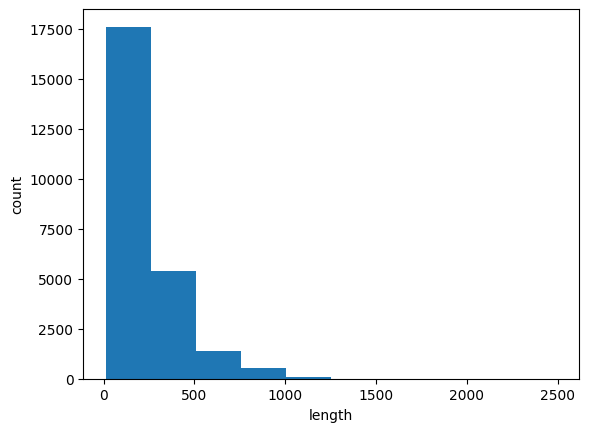

In [ ]:
plt.hist(review_len)
plt.xlabel('length')
plt.ylabel('count')
plt.show()

In [ ]:
from keras.utils import pad_sequences

X_train_p = pad_sequences(X_train, maxlen=200, padding='pre')
X_train_p[:3]

array([[  5,  25, 100,  43,   2, 112,  50,   2,   2,   9,  35, 480, 284,
          5, 150,   4, 172, 112, 167,   2, 336, 385,  39,   4, 172,   2,
          2,  17,   2,  38,  13, 447,   4, 192,  50,  16,   6, 147,   2,
         19,  14,  22,   4,   2,   2, 469,   4,  22,  71,  87,  12,  16,
         43,   2,  38,  76,  15,  13,   2,   4,  22,  17,   2,  17,  12,
         16,   2,  18,   2,   5,  62, 386,  12,   8, 316,   8, 106,   5,
          4,   2,   2,  16, 480,  66,   2,  33,   4, 130,  12,  16,  38,
          2,   5,  25, 124,  51,  36, 135,  48,  25,   2,  33,   6,  22,
         12, 215,  28,  77,  52,   5,  14, 407,  16,  82,   2,   8,   4,
        107, 117,   2,  15, 256,   4,   2,   7,   2,   5,   2,  36,  71,
         43,   2, 476,  26, 400, 317,  46,   7,   4,   2,   2,  13, 104,
         88,   4, 381,  15, 297,  98,  32,   2,  56,  26, 141,   6, 194,
          2,  18,   4, 226,  22,  21, 134, 476,  26, 480,   5, 144,  30,
          2,  18,  51,  36,  28, 224,  92,  25, 104

In [ ]:
X_train_p.shape

(25000, 200)

### 2.모델 만들기


In [ ]:
from keras import layers

model = keras.Sequential([
    layers.Embedding(500, 16, input_length=200),
    layers.LSTM(20, activation='tanh'),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 16)           8000      
                                                                 
 lstm_1 (LSTM)               (None, 20)                2960      
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 10981 (42.89 KB)
Trainable params: 10981 (42.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rmsprop  = keras.optimizers.experimental.RMSprop(
    learning_rate=0.001,
)

model.compile(
    optimizer=rmsprop,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
EPOCHS = 10
BATCH_SIZE = 256

history = model.fit(
    X_train_p, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.3,
    verbose=1
)

Epoch 1/10
69/69 [==============================] - 16s 194ms/step - loss: 0.6893 - accuracy: 0.5629 - val_loss: 0.6610 - val_accuracy: 0.6724
Epoch 2/10
69/69 [==============================] - 13s 189ms/step - loss: 0.5805 - accuracy: 0.7092 - val_loss: 0.5307 - val_accuracy: 0.7793
Epoch 3/10
69/69 [==============================] - 13s 191ms/step - loss: 0.4891 - accuracy: 0.7777 - val_loss: 0.4912 - val_accuracy: 0.7787
Epoch 4/10
69/69 [==============================] - 12s 168ms/step - loss: 0.4475 - accuracy: 0.8001 - val_loss: 0.4166 - val_accuracy: 0.8160
Epoch 5/10
69/69 [==============================] - 10s 152ms/step - loss: 0.4237 - accuracy: 0.8120 - val_loss: 0.5001 - val_accuracy: 0.7771
Epoch 6/10
69/69 [==============================] - 11s 158ms/step - loss: 0.4113 - accuracy: 0.8196 - val_loss: 0.4068 - val_accuracy: 0.8185
Epoch 7/10
69/69 [==============================] - 18s 260ms/step - loss: 0.4024 - accuracy: 0.8209 - val_loss: 0.3955 - val_accuracy: 0.8241

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1,2,1)
    plt.xlabel('epoch')
    plt.ylabel('train loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val loss')
    plt.plot(hist['epoch'], hist['accuracy'], label='accuracy')
    plt.legend()
    plt.show()

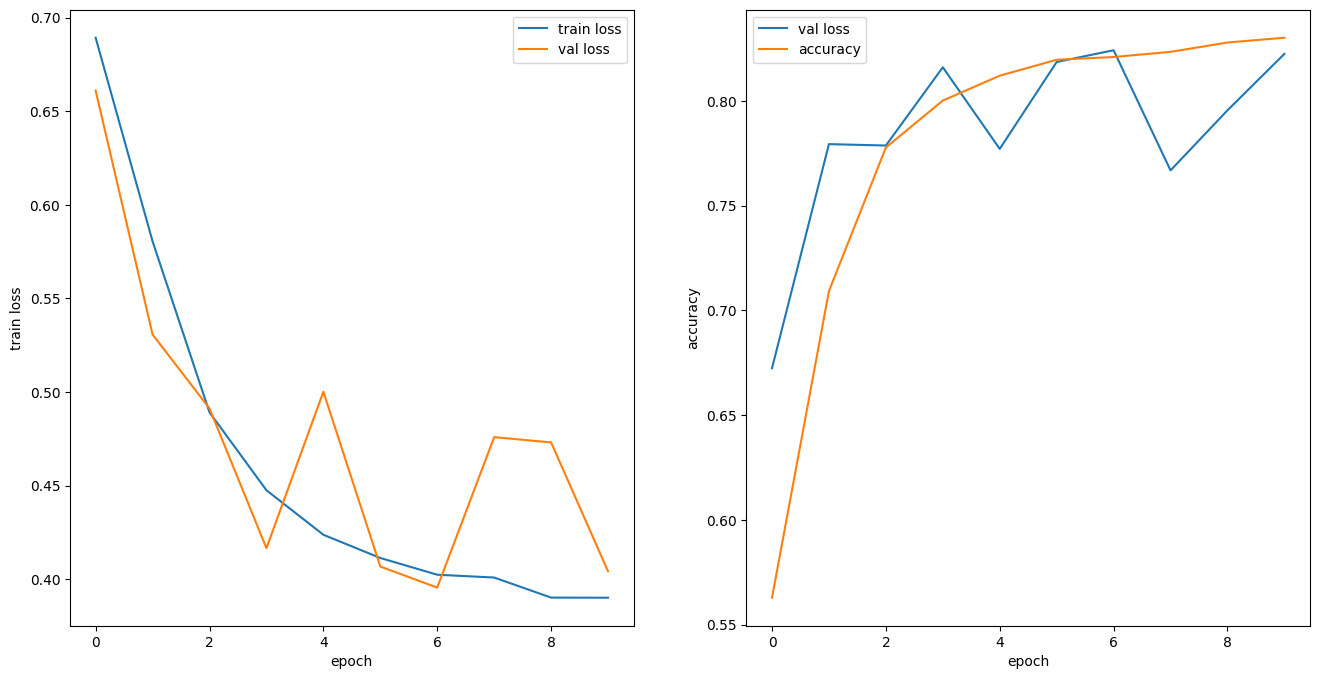

In [ ]:
plot_history(history)

In [ ]:
review = 'I thoroughly enjoyed "Spider-Man," which I saw in a screening. I thought the movie was very engrossing. Director Sam Raimi kept the action quotient high, but also emphasized the human element of the story. Tobey Maguire was very believable as the gawky teenager in the early part of the film and then, '
review = review.lower()
word_to_index = imdb.get_word_index()



In [ ]:
import re

review = re.sub('[^0-9a-zA-X ]', '', review)
review

'i thoroughly enjoyed spiderman which i saw in a screening i thought the movie was very engrossing director sam raimi kept the action quotient high but also emphasized the human element of the story tobey maguire was very believable as the gawky teenager in the early part of the film and then '

In [ ]:
encode = []

for word in review.split():
    try:
        if word_to_index[word] <=500:
            encode.append(word_to_index[word] + 3)
        else:
            encode.append(2)
    except:
        encode.append(2)


In [ ]:
np.array(encode), len(encode)

(array([ 13,   2,   2,   2,  63,  13, 219,  11,   6,   2,  13, 197,   4,
         20,  16,  55,   2, 167,   2,   2,   2,   4, 206,   2, 312,  21,
         82,   2,   4, 406,   2,   7,   4,  65,   2,   2,  16,  55,   2,
         17,   4,   2,   2,  11,   4, 402, 173,   7,   4,  22,   5,  95]),
 52)

In [ ]:
review_p = pad_sequences([encode], maxlen=200)
review_p

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  13,   2,   2,   2,  63,  13, 219,  11,
          6,   2,  13, 197,   4,  20,  16,  55,   2, 167,   2,   2,   2,
          4, 206,   2, 312,  21,  82,   2,   4, 406

In [ ]:
y_pred = model.predict(review_p)
y_pred

1/1 [==============================] - 1s 850ms/step


array([[0.79824466]], dtype=float32)